Index(['NAME', 'DEPARTMENT_NAME', 'TITLE', 'REGULAR', 'RETRO', 'OTHER',
       'OVERTIME', 'INJURED', 'DETAIL', 'QUINN/EDUCATION INCENTIVE',
       'TOTAL EARNINGS', 'POSTAL'],
      dtype='object')
                      Department Name                       Job Title  \
0            Boston Police Department                  Police Officer   
1            Boston Police Department               Police Lieutenant   
2            Boston Police Department                  Police Officer   
3            Boston Police Department              Commissioner (Bpd)   
4            Boston Police Department                  Police Officer   
5            Boston Police Department                        Supn Bpd   
6            Boston Police Department                  Police Officer   
7            Boston Police Department                  Police Officer   
8            Boston Police Department                        Supn Bpd   
9            Boston Police Department                  Police Officer  

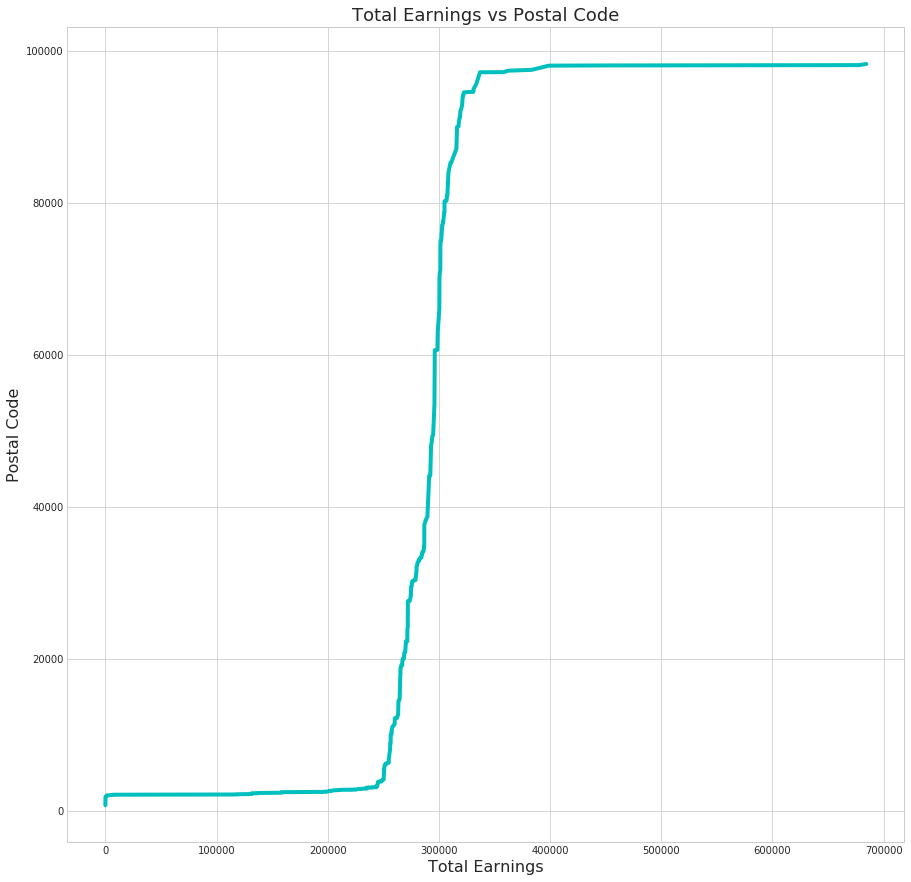

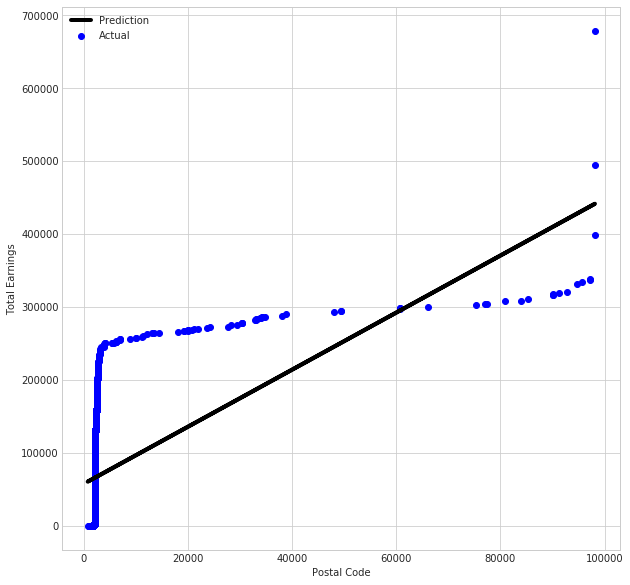

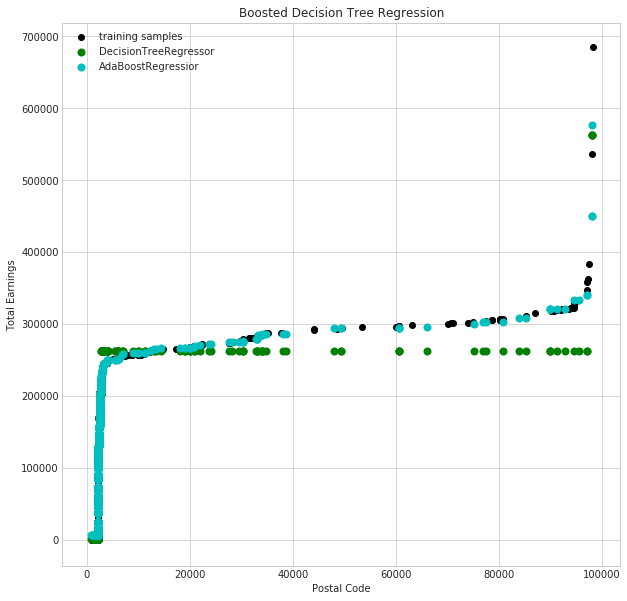

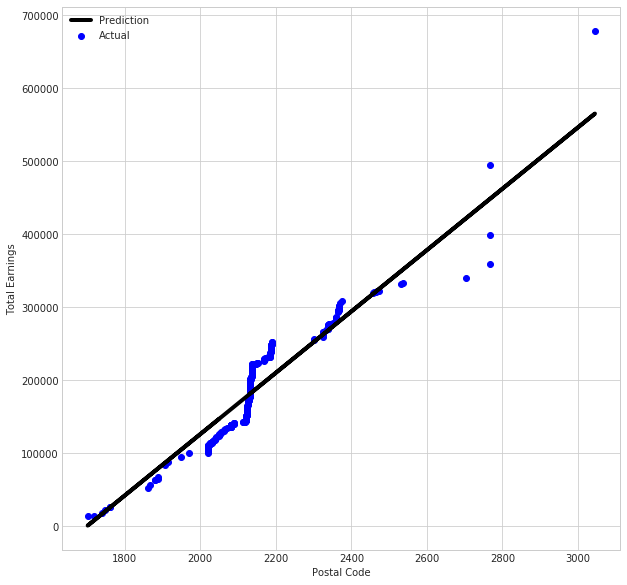

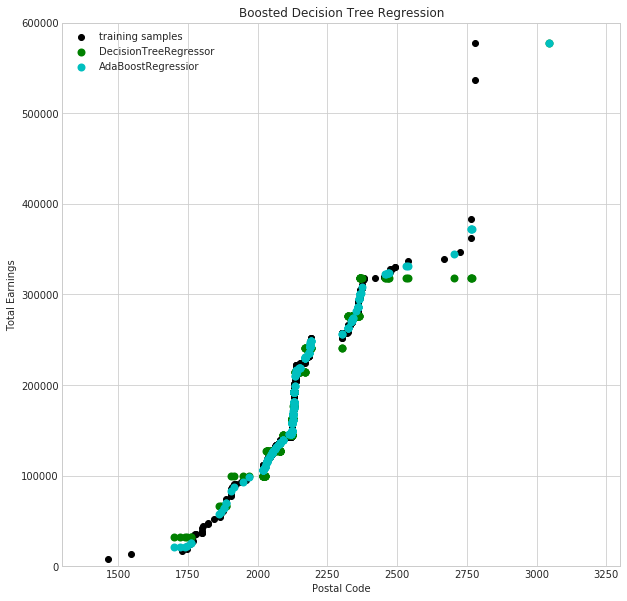

In [1]:
%matplotlib inline
import matplotlib.pyplot as plt
plt.style.use('seaborn-whitegrid')
import numpy as np
import pandas as pd
import math
import seaborn as sns

data = pd.read_csv('/home/salasjordana/employeeearnings18.csv',encoding='latin-1')
print(data.columns)
data.set_index('NAME')

df = pd.DataFrame({'Department Name': data['DEPARTMENT_NAME'],'Job Title': data['TITLE'],
                   'Total Earning':data['TOTAL EARNINGS'], 'Postal Code': data['POSTAL']})
print(df)

print(len(df))
df.corr(method='pearson')
df

# Total Earnings vs Zipcode 
fig = plt.figure(figsize = (15,15))

x = df.iloc[:,3].sort_values()
y = df.iloc[:,2].sort_values()

plt.plot(y,x,'c-',linewidth = 4)

plt.ylim(700,99000)
plt.xlim(0,690000)
plt.title('Total Earnings vs Postal Code', size=18)
plt.xlabel('Total Earnings', size = 16)
plt.ylabel('Postal Code', size = 16)
plt.axis('tight')

plt.savefig('PostalCode.png')

print(x.min())
print(x.max())
print(y.min())
print(y.max())

#Set up for Zipcodes 
x = x.astype(float)
y = y.astype(int)

X = x[:, np.newaxis]
Y = y[:, np.newaxis]

from sklearn.feature_selection import VarianceThreshold

thresholder = VarianceThreshold(threshold=.5)
X_variance = thresholder.fit_transform(X)
print(len(X_variance))
thresholder = VarianceThreshold(threshold=.5)
Y_variance = thresholder.fit_transform(Y)
print(len(Y_variance))

from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split

Xtrain, Xtest, ytrain, ytest = train_test_split(X_variance,Y_variance, test_size=0.33, random_state=42)

x = x.astype(int)
y = y.astype(int)

X = x[:, np.newaxis] 
Y = y[:, np.newaxis]

# Support Vector Regression for Zipcodes
from sklearn.svm import SVR

model = SVR(kernel= 'linear', gamma='auto')

model.fit(Xtrain, ytrain.ravel()) 
print(model)

prediction = model.predict(Xtest)

fig = plt.figure(figsize = (10,10))
plot1= plt.scatter(Xtest,ytest, c ='b', label = 'Actual')
plot2= plt.plot(Xtest, prediction, 'k', lw=4, label = 'Prediction')
plt.xlabel('Postal Code')
plt.ylabel('Total Earnings')
plt.legend(loc='upper left')

plt.savefig('SVR.png')

# Decision Tree Regression for Zipcodes
from sklearn import tree 
from sklearn.model_selection import cross_val_score
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import AdaBoostRegressor

# Fit regression model
model1 = DecisionTreeRegressor(max_depth=4)

model2 = AdaBoostRegressor(DecisionTreeRegressor(max_depth=4),
                          n_estimators=300)

model1.fit(Xtrain, ytrain.ravel()) 
model2.fit(Xtrain, ytrain.ravel()) 

# Predict
y_1 = model1.predict(Xtest)
y_2 = model2.predict(Xtest)

# Plot the results
plt.figure(figsize=(10,10))
plt.scatter(Xtrain, ytrain, c="k", label="training samples")
plt.scatter(Xtest, y_1,c="g", label="DecisionTreeRegressor", linewidth=2)
plt.scatter(Xtest, y_2,c="c", label="AdaBoostRegressior", linewidth=2)
plt.xlabel('Postal Code')
plt.ylabel('Total Earnings')
plt.title("Boosted Decision Tree Regression")
plt.legend()

from sklearn.model_selection import cross_val_score
scores = cross_val_score(model1,Xtest, ytest, cv=5)
print(scores)
print('Accuracy:%0.2f' % scores.mean(), scores.std()*2)

plt.savefig('Decision Tree Regression.png')

df_top= df.head(1000)
df_top

#Set up for Zipcodes 1000 data points 

x = df_top.iloc[:,3].sort_values()
y = df_top.iloc[:,2].sort_values()

x = x.astype(float)
y = y.astype(int)

X = x[:, np.newaxis]
Y = y[:, np.newaxis]

from sklearn.feature_selection import VarianceThreshold

thresholder = VarianceThreshold(threshold=.5)
X_variance = thresholder.fit_transform(X)
print(len(X_variance))
print(len(Y_variance))

thresholder = VarianceThreshold(threshold=.5)
Y_variance = thresholder.fit_transform(Y)

from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split

Xtrain, Xtest, ytrain, ytest = train_test_split(X_variance,Y_variance, test_size=0.33, random_state=42)

# Support Vector Regression for Zipcodes
from sklearn.svm import SVR

model = SVR(kernel= 'linear', gamma='auto')

model.fit(Xtrain, ytrain.ravel()) 
print(model)


from sklearn.model_selection import cross_val_score
scores = cross_val_score(model1,Xtest, ytest, cv=5)
print(scores)
print('Accuracy:%0.2f' % scores.mean(), scores.std()*2)


prediction = model.predict(Xtest)

fig = plt.figure(figsize = (10,10))
plot1= plt.scatter(Xtest,ytest, c ='b', label = 'Actual')
plot2= plt.plot(Xtest, prediction, 'k', lw=4, label = 'Prediction')
plt.xlabel('Postal Code')
plt.ylabel('Total Earnings')
plt.legend(loc='upper left')

plt.savefig('SVR1000.png')

# Decision Tree Regression for Zipcodes
from sklearn import tree 
from sklearn.model_selection import cross_val_score
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import AdaBoostRegressor

# Fit regression model
model1 = DecisionTreeRegressor(max_depth=4)

model2 = AdaBoostRegressor(DecisionTreeRegressor(max_depth=4),
                          n_estimators=300)

model1.fit(Xtrain, ytrain.ravel()) 
model2.fit(Xtrain, ytrain.ravel()) 

# Predict
y_1 = model1.predict(Xtest)
y_2 = model2.predict(Xtest)

# Plot the results
plt.figure(figsize=(10,10))
plt.scatter(Xtrain, ytrain, c="k", label="training samples")
plt.scatter(Xtest, y_1,c="g", label="DecisionTreeRegressor", linewidth=2)
plt.scatter(Xtest, y_2,c="c", label="AdaBoostRegressior", linewidth=2)
plt.xlabel('Postal Code')
plt.ylabel('Total Earnings')
plt.title("Boosted Decision Tree Regression")
plt.xlim(1300,3300)
plt.ylim(0,600000)
plt.legend()

plt.savefig('Decision Tree Regression1000.png')